# Financial Prediction

## Do The imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import riskfolio as rf
from prophet import Prophet
import gradio

## Gradio Input

In [37]:
start = "2012-01-01" #input gradio
end = "2019-12-31"  #input gradio
tickers_list = ["TSLA","GOOGL"]  #input gradio
prediction_start_date = "2018-01-01" #input gradio
dict_resample = {"yearly" : "Y", "monthly" : "M", "weekly" : "W","daily" : "D"}
resample_period = "monthly" #input gradio
periods = 24    #input gradio

## Download Data

In [41]:
data = yf.download(tickers_list, start = start, end = end)
data = data.loc[:,("Adj Close", slice(None))]
data.columns = tickers_list
data = data.reset_index()
data_resample = data.resample(dict_resample[resample_period], on = "Date").last()
data_resample = data_resample.dropna()
data_resample = data_resample.reset_index()

[*********************100%***********************]  2 of 2 completed


,Date,TSLA,GOOGL
0,2012-01-31,16.651901,1.872000
1,2012-02-29,14.535285,1.972000
2,2012-03-31,15.575576,2.294000
3,2012-04-30,16.189190,2.438667
4,2012-05-31,15.125876,2.252000
...,...,...,...
91,2019-08-31,60.589001,15.590000
92,2019-09-30,58.477501,15.000667
93,2019-10-31,60.299999,16.312668
94,2019-11-30,63.612499,20.887333


## Make Prediction

11:19:18 - cmdstanpy - INFO - Chain [1] start processing
11:19:19 - cmdstanpy - INFO - Chain [1] done processing


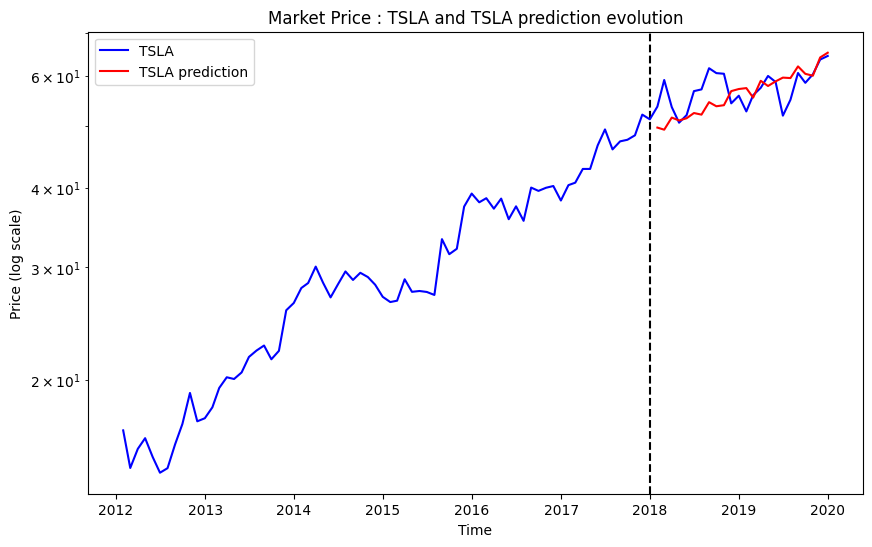

11:19:19 - cmdstanpy - INFO - Chain [1] start processing
11:19:20 - cmdstanpy - INFO - Chain [1] done processing


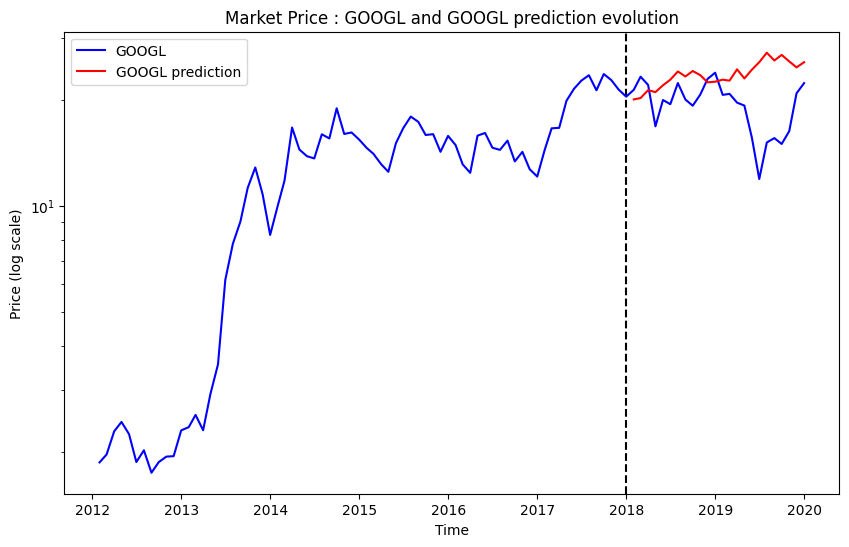

In [48]:
for ticker in tickers_list : 

    model = Prophet()
    data_ticker = data_resample[["Date",ticker]]
    data_ticker_model = data_ticker[data_ticker["Date"] < prediction_start_date]
    data_ticker_model = data_ticker_model.rename({"Date" : "ds", ticker : "y"}, axis = "columns")
    model.fit(data_ticker_model)
    futur = model.make_future_dataframe(periods = periods , freq = dict_resample[resample_period])
    data_ticker_prediction = model.predict(futur)
    #model.plot(data_ticker_prediction,uncertainty=True)
    #model.plot_components(data_ticker_prediction)
    data_resample [f"{ticker} prediction"] = data_ticker_prediction["yhat"]
    plt.figure(figsize = (10,6))
    plt.title(f"Market Price : {ticker} and {ticker} prediction evolution")
    plt.axvline(x = datetime.datetime.strptime(prediction_start_date,"%Y-%M-%d"), color = "black", linestyle = "dashed")
    plt.plot(data_resample["Date"],data_resample[ticker],color = "blue", label = ticker)
    plt.plot(data_resample[data_resample["Date"] >= prediction_start_date]["Date"],data_resample[data_resample["Date"] >= prediction_start_date][f"{ticker} prediction"],color = "red", label = f"{ticker} prediction")
    plt.yscale(value = "log")
    plt.xlabel("Time")
    plt.ylabel("Price (log scale)")
    plt.legend(loc = "upper left")
    plt.show()

## Portfolio Optimisation 

In [ ]:
data_optimisation = data_resample.copy()
data_optimisation[data_optimisation.columns.drop("Date")] = data_optimisation[data_optimisation.columns.drop("Date")].pct_change()*100
data_optimisation = data_optimisation.dropna()
data_optimisation
